<a href="https://colab.research.google.com/github/mugorunen/Edge_Detection_Methods/blob/main/Unsupervised_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Learning**

The coding questions are independent of the theoretical questions.

In this assignment, we will build the simplest models for unsupervised learning for a linear neuron:

$$y = \sum\limits_{i=1}^{n} w_i x_i. \tag{1}$$


Here ${x_i}$ are input neurons and $w_i$ are the associated synaptic weights. Let's start with the assumption that synaptic weights are increased in proportion to the correlation between pre-synaptic and post-synaptic activity; synchonized firing $⟶$ stronger wiring: 


$$\Delta w_i = \tau <y,x_i>, \tag{2}$$

where $\Delta w_i$ is the change in the strength of synapse $w_i$, $<.>$ is the average over the time window over which the weights are updated (if $y$ and $x_i$ are observed once over the time window then $<y,x_i> = y\,x_i $), and the parameter $\tau > 0$ is a slow learning rate.



1) Suppose you have $m$ observations for each input $x_i$: $x_i^1,x_i^2,\cdots,x_i^m$. These observations are faster than the learning rate. After all the observations have occurred, we want to evaluate the synaptic weights. Show that the weights vector $\mathbf{w}^T={w_1,w_2, ..., w_n}$ is the solution to a differential equation of the form:

$$\gamma \frac{d \mathbf{w}}{d t}  = C \, \mathbf{w},$$
with $\gamma > 0$ and $C$ is the correlation matrix such that $C_{i,j} =  \sum\limits_{i=1}^{m} x_i^m x_j^m$.




In [ ]:
## Answer here 
...

2) The dataset "input.npy" contains presynaptic activity from two input neurons at random time points. Using the the rules (1) and (2), write a program that simulates the output $y$ and estimates the weights vector ${w_i}$. You can select the points in the data randomly and thus estimate the weights by stochastic gradient ascent. 

3) Run the program with 150 iterations (select randomly 150 observations out of the 1000) and plot the weights and the data. What is the estimated vector ? Do you understand why ?



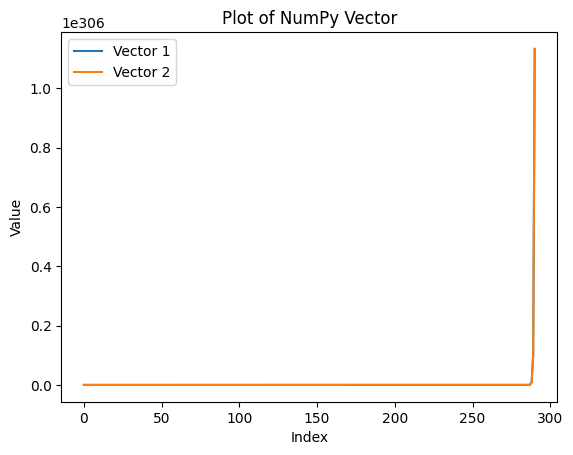

In [50]:
import numpy as np

import matplotlib.pyplot as plt


inputdata = np.load('input.npy')

nb_samples = inputdata.shape[1]


# Set random seed for reproducibility
np.random.seed(1)


# 2 inputs, 1 output (initialize the weights)
weights = np.random.rand(2,1) 

lrate = 0.01 # This rate should work

#  CODE THE LOOP HERE AND PLOT RESULTS
weightsvec_1 = np.empty(501)
weightsvec_2 = np.empty(501)
weightsvec_1[0] = weights[0]
weightsvec_2[0] = weights[1]

for i in range(500):
  y = np.dot(weights.T,inputdata)
  deltaw_1 = lrate*np.dot(y,inputdata[0])
  deltaw_2 = lrate*np.dot(y,inputdata[1])
  weights[0] = weights[0]+deltaw_1
  weights[1] = weights[1]+deltaw_1
  weightsvec_1[i+1]=weights[0]
  weightsvec_2[i+1]=weights[1]


plt.plot(weightsvec_1, label='Vector 1')
plt.plot(weightsvec_2, label='Vector 2')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of NumPy Vector')


plt.legend()
# Display the plot
plt.show()



In [39]:
np.dot(y, inputdata[0])

array([1.39314128e+160])

In [42]:
np.mean(y*inputdata[0])

2.7289570343571223

4) Run the function with 300 and 500 iterations (same wights intialization and learning rate) and plot the results. Do you understand why the weights behave this way ? Is it biologically plausible that this happens ?


In [ ]:
# Set random seed for reproducibility
np.random.seed(1)


# CODE and Answer here



From questions (1-4), you might noticed that the pure linear model will make some weights very large while reducing the others to zero. This is sometimes not desirable. Think of a layer 4 neuron taking inputs from two LGN neurons (each associated with an input from the left or the right eye). If one of the weights become very large compared to the other, we would reach a biologically implausible ocular dominance. One way to solve this problem is to constrain the growth of each weight in the following way:

$$\Delta w_i = \tau (<y,x_i> - \bar{w}_i y^2), \tag{3}$$

where $\bar{w}_i$ is the current weights. This way, we make sure the weights are bounded.


5) Update the program you wrote before to perform rule (3). Run the function with $2000$ iterations. Comment.

In [ ]:
# Set random seed for reproducibility
np.random.seed(1)


# CODE and Answer here
import numpy as np

import matplotlib.pyplot as plt


# Set random seed for reproducibility
np.random.seed(1)


# 2 inputs, 1 output (initialize the weights)
weights = np.random.rand(2,1) 

lrate = 0.01 # This rate should work

#  CODE THE LOOP HERE AND PLOT RESULTS
weightsvec_1 = np.empty(501)
weightsvec_2 = np.empty(501)
weightsvec_1[0] = weights[0]
weightsvec_2[0] = weights[1]

for i in range(500):
  y = np.dot(weights.T,inputdata)
  deltaw_1 = lrate*(np.mean(y*inputdata[0]) - 
  deltaw_2 = lrate*(np.mean(y*inputdata[1])
  weights[0] = weights[0]+deltaw_1
  weights[1] = weights[1]+deltaw_1
  weightsvec_1[i+1]=weights[0]
  weightsvec_2[i+1]=weights[1]


plt.plot(weightsvec_1, label='Vector 1')
plt.plot(weightsvec_2, label='Vector 2')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of NumPy Vector')


plt.legend()
# Display the plot
plt.show()





Let's consider the case of multipe linear neurons each following rule (1):

$$y_j = \sum\limits_{i=1}^{n} w_{ij} x_i. \tag{4}$$

One method to estimate the weights is by generalizing rule (3) in the following way:

$$\Delta w_{ij} = \tau (<y_j,x_i> -  y_j \sum\limits_{k \leq j}\bar{w}_{i,k} \, y_k), \tag{5}$$

For the first output neuron, this rule is the same as rule (3). The following weights are updated by taking the residuals from previous weights.

6) Update your program in order to take into account multiple neurons following rule (5). Run the program with two output neurons using the same data and plot the weights. 

(This algorithm might have trouble converging. Use $20000$ iterations and initialize the weights randomly like in the other questions)


In [ ]:
# Set random seed for reproducibility
np.random.seed(1)


# CODE and Answer here




In [49]:
# Initialize the weights vector
weights = np.random.rand(2, 1)

# Set the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 150

# Lists to store the weights and loss values
weights_history = [weights.copy()]
loss_history = []

# Perform stochastic gradient ascent
for _ in range(num_iterations):
    # Select a random observation from the input data
    input_data = inputdata
  
    observation = input_data
    
    # Extract the input neurons xi and the target output y
    xi = observation[:-1].reshape(-1, 1)
    y = observation[-1]
    
    # Calculate the predicted output
    predicted_output = np.dot(weights.T, xi)
    
    # Update the weights
    delta_w = learning_rate * (y - predicted_output) * xi
    weights += delta_w
    
    # Store the weights and loss value
    weights_history.append(weights.copy())
    loss = (y - predicted_output) ** 2
    loss_history.append(loss)

# Convert the weights history to a NumPy array
weights_history = np.concatenate(weights_history, axis=1)

# Plot the weights and data
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(weights_history[0], label='w1')
plt.plot(weights_history[1], label='w2')
plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.title('Weight Evolution')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(input_data[:, 0], input_data[:, 1], c=input_data[:, 2], cmap='viridis')
plt.xlabel('Input Neuron 1')
plt.ylabel('Input Neuron 2')
plt.title('Input Data')
plt.colorbar()

plt.tight_layout()
plt.show()

# Print the final estimated weights vector
estimated_weights = weights_history[:, -1]
print("Estimated Weights:", estimated_weights)

ValueError: ignored